# PyCaret Tutorial

This tutorial will not cover PyCaret as a whole, but it will rather focus on the entire pipeline for a single classification problem. We will use the wine recognition dataset:

Lichman, M. (2013). [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

## What is PyCaret?

PyCaret is a library that comes to automate the Machine Learning (ML) process requiring very few lines of code. It works with multiple other useful ML libraries, such as scikit-learn.

Check out their website for more information: [PyCaret Homepage](https://pycaret.org).

## Installing PyCaret

### Virtual environment

First, we create a virtual environment to ensure we do not have unnecessary packages as well as to keep things isolated and light.

Using `venv`:

```shell
$ python -m venv /path/to/new/virtual/environment
```

And to activate it:

```shell
$ source /path/to/new/virtual/environment/bin activate
```

Using `conda`:

```shell
$ conda create --name venv pip
```

And to activate it:

```shell
$ conda source venv activate
```

### Actual PyCaret installation

We use `pip` to install it:

```shell
$ pip install pycaret
```
Or on the notebook:

```notebook
! pip install pycaret
```

## Dataset

We will import the dataset from Scikit-learn:

In [1]:
import sklearn
from sklearn.datasets import load_wine
print(f"Scikit-learn version: {sklearn.__version__}")
import pandas as pd
import numpy as np

Scikit-learn version: 0.23.2


In [2]:
data = load_wine()
df = pd.DataFrame(data=np.c_[data['data'], data['target']],
                  columns=data['feature_names'] + ['target'])
df.shape

(178, 14)

Let's do some _**very brief**_ EDA on the dataset:

In [3]:
display(df.head())
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


All data is numeric and without missing values.

In [4]:
# Checking the classes
df['target'].value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

The classes are not very imbalanced.

**Splitting the dataset into train and test**

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,
                                     test_size=0.20,
                                     random_state=0,
                                     stratify=df['target'])

## Initializing PyCaret

We can, now, import PyCaret and start playing around with it!

In [6]:
import pycaret
from pycaret.classification import *
print(f"PyCaret version: {pycaret.__version__}")

PyCaret version: 2.3.1


PyCaret syntax asks us to setup the data as the first step, providing the input data with the features and the target variable. This `setup` function is how PyCaret initializes the pipeline for future preprocessing, modeling, and deployment. It requires two parameters: `data`, a pandas dataframe, and `target`, the name of the target column. There are other parameters, but they are all optional and we will not cover them at this point.

The `setup` infers on its own the features' data types, but it is worth double checking since it may do it incorrectly sometimes. A table showing the features and their data types is displayed after running the `setup`. It asks us to confirm if correct and press enter. If something is incorrect, then we can correct it by typing `quit`. Otherwise, we can proceed. Notice that getting the data types right is extremely important, because PyCaret automatically preprocesses the data based on each feature's type. Preprocessing is a fundamental and critical part of doing ML properly.

In [7]:
# setup the dataset
grid = setup(data=df_train, target='target')

,Description,Value
0,session_id,6420
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(142, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Among the optional parameters we skipped, there were options for preprocessing such as outline removal, feature selection, feature encoding, dimensionality reduction, how to split between train and test set, and many more! Check out the documentation for more details.


## Comparing different models

After setting up, the time to compare and evaluate different models has arrived! And this is done so easily that pretty much anyone with a minimal knowledge on metrics could pick up the best model. This is one of the cool PyCaret's features that allows us to save a lot of time.


PyCaret uses 10-fold cross-validation as its default, sort results by classification accuracy, returns the best model, and displays the results of all tested classifiers with different metrics.

In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9700,0.9975,0.9750,0.9770,0.9698,0.9545,0.9585,0.0790
nb,Naive Bayes,0.9600,0.9950,0.9639,0.9678,0.9598,0.9394,0.9431,0.0060
et,Extra Trees Classifier,0.9600,0.9967,0.9700,0.9703,0.9604,0.9384,0.9438,0.0670
ridge,Ridge Classifier,0.9589,0.0000,0.9600,0.9686,0.9578,0.9365,0.9423,0.0050
lightgbm,Light Gradient Boosting Machine,0.9500,1.0000,0.9589,0.9623,0.9486,0.9242,0.9315,0.1100
lda,Linear Discriminant Analysis,0.9489,0.9936,0.9533,0.9619,0.9483,0.9211,0.9283,0.0060
qda,Quadratic Discriminant Analysis,0.9389,0.9950,0.9167,0.9534,0.9319,0.9023,0.9135,0.0070
dt,Decision Tree Classifier,0.9200,0.9369,0.9167,0.9330,0.9178,0.8773,0.8855,0.0060
lr,Logistic Regression,0.9189,0.9888,0.9194,0.9314,0.9175,0.8762,0.8830,0.4420
gbc,Gradient Boosting Classifier,0.8900,0.9876,0.8922,0.9127,0.8883,0.8290,0.8416,0.0770


Showing the best classifier:

In [9]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6420, verbose=0,
                       warm_start=False)


## Tuning a model

The models used when comparing use their default hyperparameters. We can tune and choose the best hyperparameters for a single model using PyCaret. This is done by running a Random Grid Search on a specific search space. We can, as well, define a custom search grid, but we will not do it at this point. Also, there are many hyperparameters that allow us to choose early stopping, number of iterations, which metric to optimize for, and so on. Tuning returns a similar table as before, but each row now shows the result for each validation fold.

We will tune the K Neighbors Classifier, since it performed poorly with its default parameters. To do so, we first create a model with PyCaret:


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
tuned_knn = tune_model(KNeighborsClassifier(), n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9000,0.9300,0.9333,0.9250,0.9016,0.8438,0.8573
2,0.7000,0.7929,0.6944,0.7400,0.7067,0.5385,0.5471
3,0.8000,0.9083,0.8056,0.8250,0.7971,0.6970,0.7078
4,0.9000,0.9012,0.8889,0.9200,0.8956,0.8462,0.8598
5,0.8000,0.8298,0.7778,0.8450,0.7627,0.6923,0.7273
6,0.7000,0.8857,0.6944,0.7400,0.7067,0.5385,0.5471
7,0.9000,1.0000,0.9167,0.9333,0.9029,0.8485,0.8616
8,0.8000,0.8458,0.8333,0.9000,0.8000,0.7059,0.7500
9,0.7778,0.9000,0.6667,0.6296,0.6889,0.6250,0.6934


In [12]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')


## Plotting a model

If just seeing a table is not enough, you can plot the results of a model in different ways. Here are a few examples:

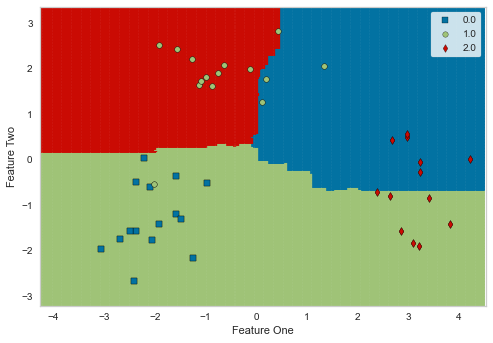

In [13]:
plot_model(best, plot='boundary')

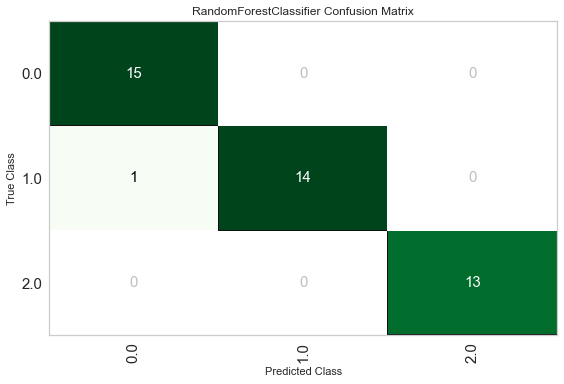

In [14]:
plot_model(best, plot='confusion_matrix')

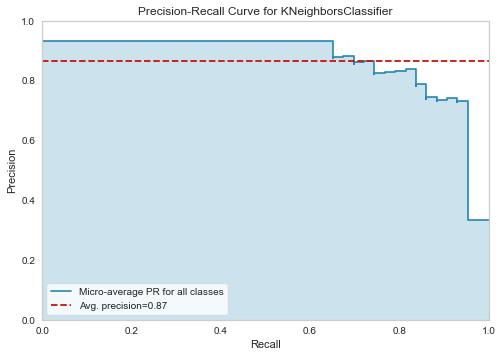

In [15]:
plot_model(tuned_knn, plot='pr')

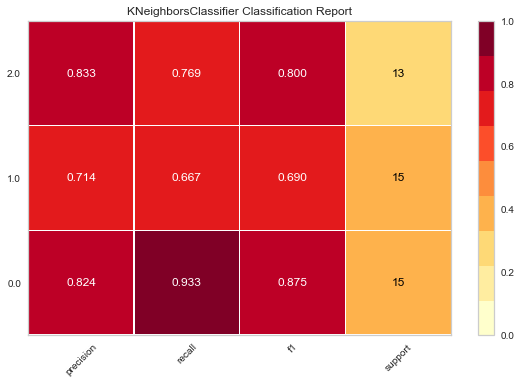

In [16]:
plot_model(tuned_knn, plot='class_report')

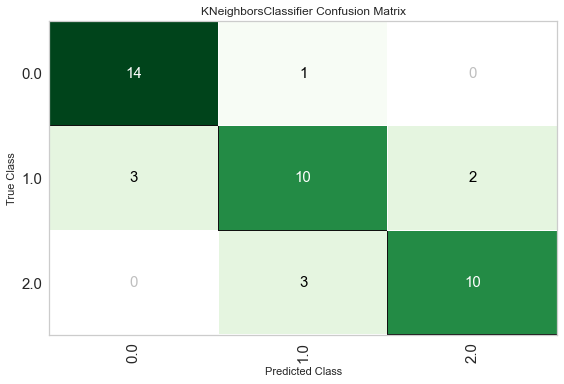

In [17]:
plot_model(tuned_knn, plot='confusion_matrix')

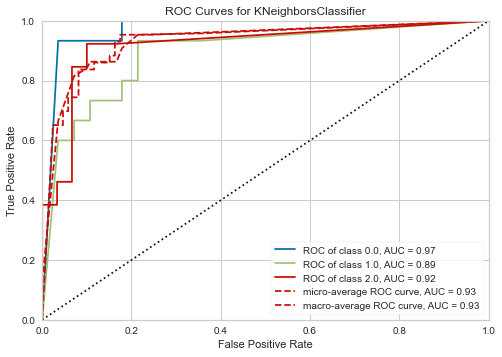

In [18]:
plot_model(tuned_knn, plot='auc')

## Explainable AI

Most businesses do not like to have a black-box model telling them what to do. It is extremely important to understand what the model does so that the business can take action to improve their results.

For this, we need to install the [shap](https://shap.readthedocs.io/en/latest/index.html) library:

```shell
$ pip install shap
```

Or on the notebook:

```notebook
! pip install shap
```

This library is based on the concept of Shapley values created in the Game Theory context to compute feature importance. For now, it is only available for tree-based models.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = create_model(RandomForestClassifier())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,1.0000,0.9167,0.9250,0.9000,0.8507,0.8636
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,1.0000,0.9167,0.9250,0.9000,0.8507,0.8636
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.9667,0.9167,0.9200,0.8984,0.8438,0.8573
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Summary plot

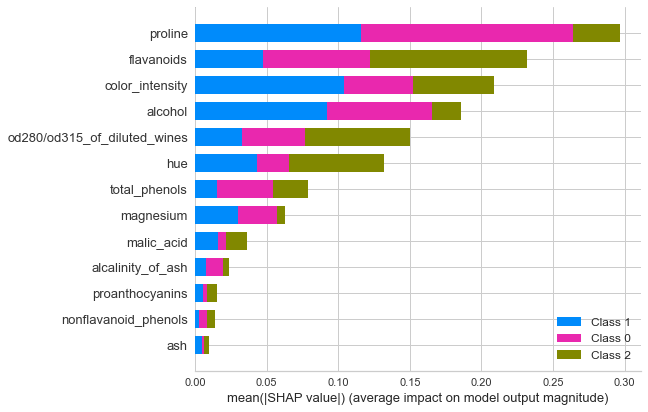

In [20]:
interpret_model(rf, plot='summary')

### Correlation plot

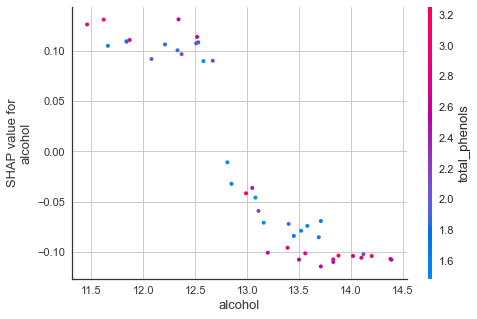

In [21]:
interpret_model(rf, plot='correlation')

### Reason plot

#### All observation

In [22]:
interpret_model(rf, plot='reason')

#### A specific observation

In [23]:
interpret_model(rf, plot='reason', observation=10)

## Predicting

Now that the exploratory phase is over, we can predict the results on unseen data.

In [24]:
best_final = finalize_model(best)
predictions = predict_model(best_final, data=df_test.drop('target', axis=1))

In [25]:
from sklearn.metrics import classification_report

print(classification_report(df_test['target'], predictions['Label']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## What now?

PyCaret allows you to do predictions direct from the cloud, so check it out in their [website](https://pycaret.org/predict-model/) if you want to do this.

Also, you can build your [ensemble](https://pycaret.org/ensemble-model/) models with PyCaret.

They support not only Classification, but also Regression, Anomaly Detection, Clustering, Natural Language Processing, and Association Rules Mining.

##### References

[1] [PyCaret Homepage](https://pycaret.org/)

[2] [PyCaret documentation](https://pycaret.readthedocs.io/)

[3] [Multiclass Classification Tutorial](https://github.com/pycaret/pycaret/blob/master/tutorials/Multiclass%20Classification%20Tutorial%20Level%20Beginner%20-%20MCLF101.ipynb)

[4] [A Gentle Introduction to PyCaret for Machine Learning](https://machinelearningmastery.com/pycaret-for-machine-learning/)